# csv 파일을 로드에서 결합
1. csv 폴더에서 transaction_1, transaction_2, transaction_detail_1, transaction_detail_2 파일 4개 로드
2. transaction_1, transaction_2 데이터프레임을 단순한 행 결합
3. transaction_detail_1, transaction_detail_2 데이터프레임도 단순한 행 결합
4. 2번 과정에서 나온 데이터프레임과 3번 과정에서 나온 데이터프레임을 특정 조건을 갖고 열 결합
(특정 조건 찾아보기)  


In [47]:
import pandas as pd
import numpy as np

In [87]:
tran1 = pd.read_csv('../csv/transaction_1.csv')
tran2 = pd.read_csv('../csv/transaction_2.csv')
tran_dt1 = pd.read_csv('../csv/transaction_detail_1.csv')
tran_dt2 = pd.read_csv('../csv/transaction_detail_2.csv')

In [88]:
# 데이터프레임 행 추가 단순 결합
tran = pd.concat([tran1, tran2], axis=0, ignore_index=True) # 옵션 기본 값이라 안적어도 됨
tran_dt = pd.concat([tran_dt1, tran_dt2])

In [89]:
tran.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [90]:
tran_dt.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [91]:
tran_mer = pd.merge(tran, tran_dt, on = 'transaction_id', how='inner') # 데이터가 같아서 how 뭘 넣든 같은거 나올것.
tran_mer.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [92]:
#payment_date 시계열로 변경하고
tran_mer["payment_date"] = pd.to_datetime(tran_mer["payment_date"])
tran_mer["payment_date"]

0      2019-02-01 01:36:57
1      2019-02-01 01:37:23
2      2019-02-01 02:34:19
3      2019-02-01 02:47:23
4      2019-02-01 04:33:46
               ...        
7139   2019-07-31 21:20:44
7140   2019-07-31 21:52:48
7141   2019-07-31 23:35:25
7142   2019-07-31 23:39:35
7143   2019-07-31 23:41:38
Name: payment_date, Length: 7144, dtype: datetime64[ns]

In [93]:
# 데이터 타입 확인
print(type(tran_mer["payment_date"]))

<class 'pandas.core.series.Series'>


In [94]:
print(type(tran_mer))

<class 'pandas.core.frame.DataFrame'>


In [95]:
# datetime format

# 데이터 결합
1. customer_master, item_master 파일 로드
2. join_data 특정 조건에 맞게 열 추가
3. 결합이 된 데이터에서 quantity컬럼, item_price컬럼 존재.  
두 개의 곱을 해 새로운 파생변수 total_price 생성  
4. 6개의 csv 파일이 결합된 데이터프레임에 payment_date 컬럼의 값을 가지고 payment_month 라는 새로운 파생변수를 만든다. 파생변수에 들어갈 값은 년-월
5. payment_month를 기준으로 그룹화해서 total_price의 합을 구해라
6. 이를 시각화 (년월로 묶여서 얼마나 팔렸는지 알 수 있을 것)

In [96]:
cs_master = pd.read_csv('../csv/customer_master.csv')
cs_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [97]:
tran_mer.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [98]:
item_master = pd.read_csv('../csv/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [99]:
transaction1 = pd.merge(tran_mer, item_master, on='item_id', how='left')
transaction1.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000
1,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000
2,T0000000121,210000,2019-02-01 06:40:14,HD218970,8,S005,1,PC-E,210000
3,T0000000128,210000,2019-02-01 17:20:02,IK234815,15,S005,1,PC-E,210000
4,T0000000130,210000,2019-02-01 19:44:40,AS614406,17,S005,1,PC-E,210000


In [100]:
transaction = pd.merge(transaction1, cs_master, on='customer_id', how='left')
transaction.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,PC-A,50000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,PC-A,50000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,PC-A,50000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
4,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시


In [101]:
transaction["total_price"] = transaction["quantity"] * transaction["item_price"]
transaction.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,PC-A,50000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,50000
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,PC-A,50000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,50000
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,PC-A,50000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,50000
4,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,210000


4. 6개의 csv 파일이 결합된 데이터프레임에 payment_date 컬럼의 값을 가지고 payment_month 라는 새로운 파생변수를 만든다. 파생변수에 들어갈 값은 년-월
5. payment_month를 기준으로 그룹화해서 total_price의 합을 구해라
6. 이를 시각화

In [112]:
# payment_month 새로운 파생변수 생성 -> payment_date에서 년과 월을 추출해서 값을 삽입
transaction['payment_month'] = transaction['payment_date'].dt.strftime("%Y-%m")
                                                            #이 데이터 형식에서
                                                                #이거만 추출해줘잉
transaction.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000,2019-02


In [116]:
# payment_month 기준으로 그룹화해 total_price의 합을 추출 -> 시각화
group_data = transaction.groupby('payment_month').sum()['total_price']
            #이 데이터의          #인자값 ()              #컬럼 []
group_data

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: total_price, dtype: int64

In [123]:
print(type('payment_month'))
print(type(transaction['payment_month']))
print(type(transaction['total_price']))

<class 'str'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [117]:
import matplotlib.pyplot as plt

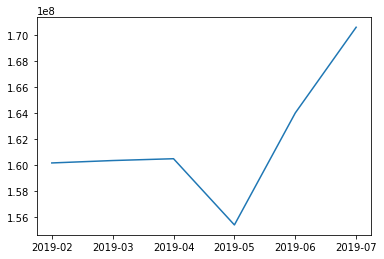

In [119]:
plt.plot(group_data)
plt.show()